In [1]:
# Data Cleaning
import pandas as pd
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context = 'notebook' , style = 'whitegrid' , palette = 'Set2')
%matplotlib inline

# preprocessing data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


random_state=42

In [3]:
df = pd.read_csv('./data.csv') # Load the csv file

In [4]:
# Drop columns
df_1=df.copy()
df_1.drop(columns=['Unnamed: 32','id'], inplace=True)

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
df_1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


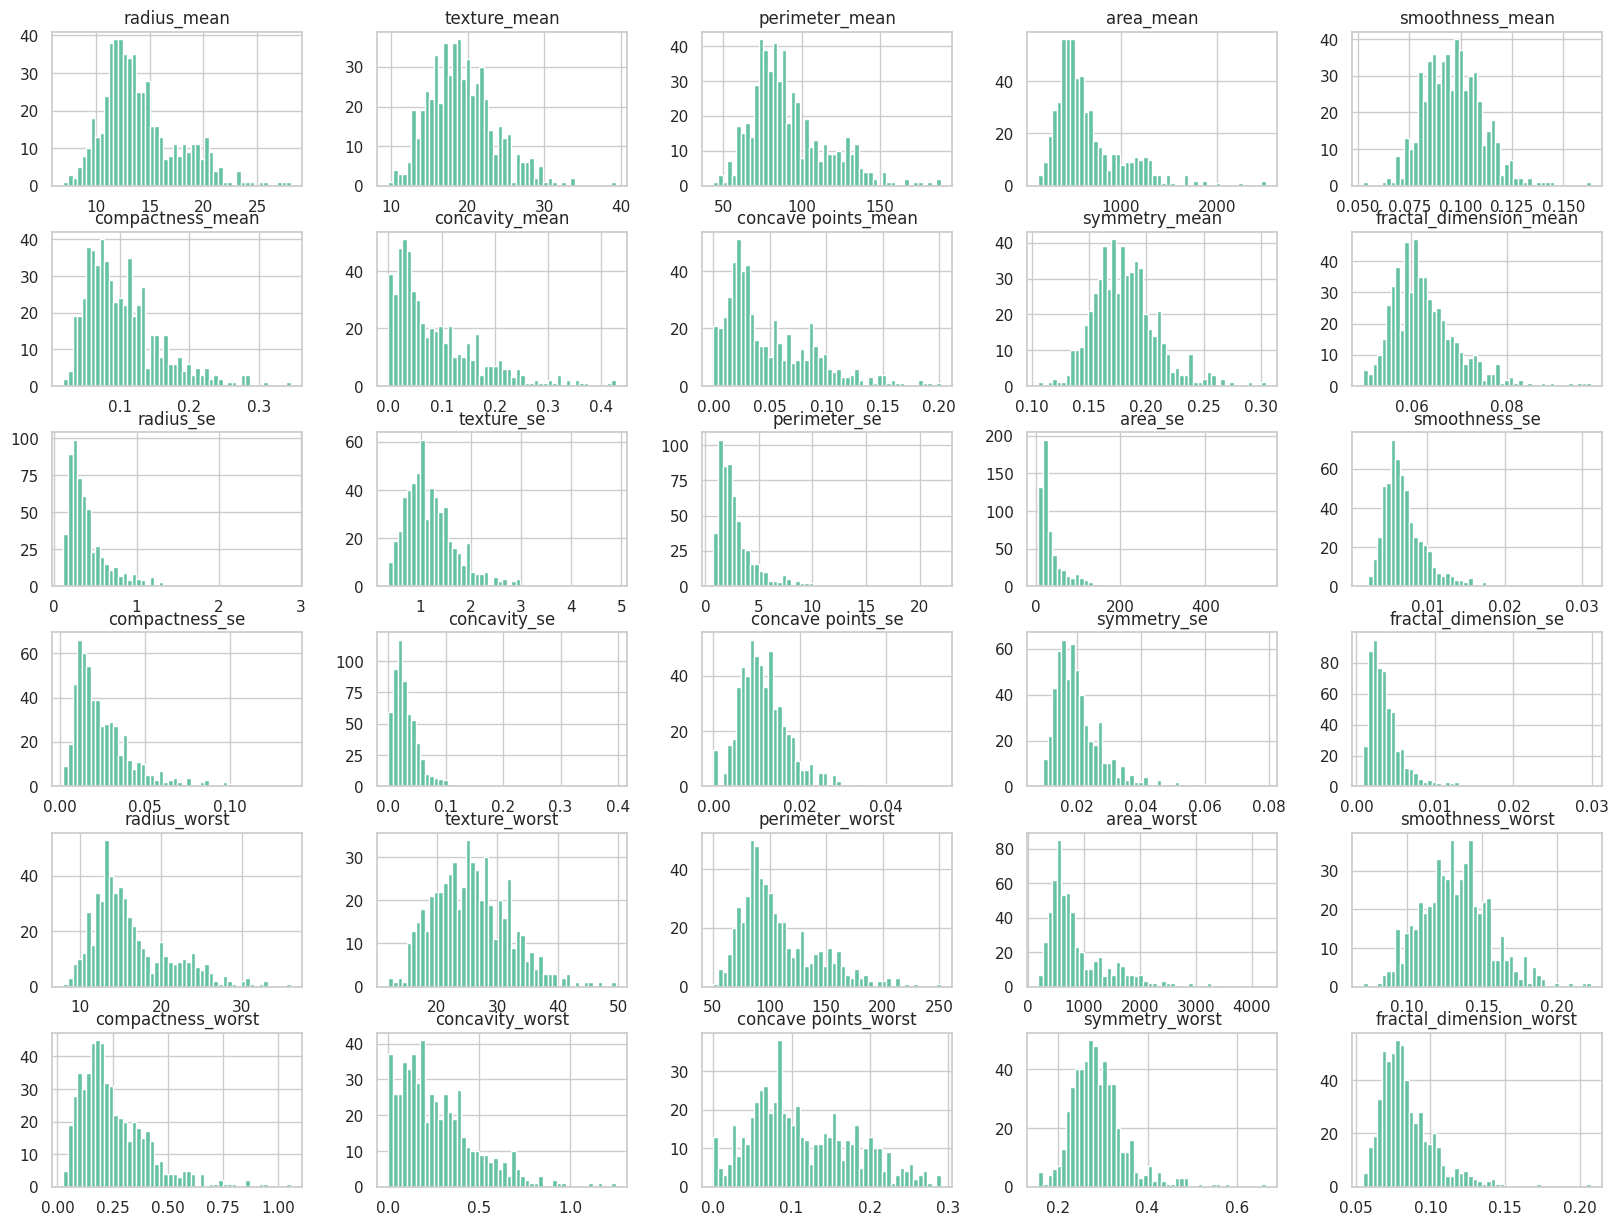

In [7]:
df_1.hist(bins=50,figsize=(20,15))
plt.show()

<Axes: >

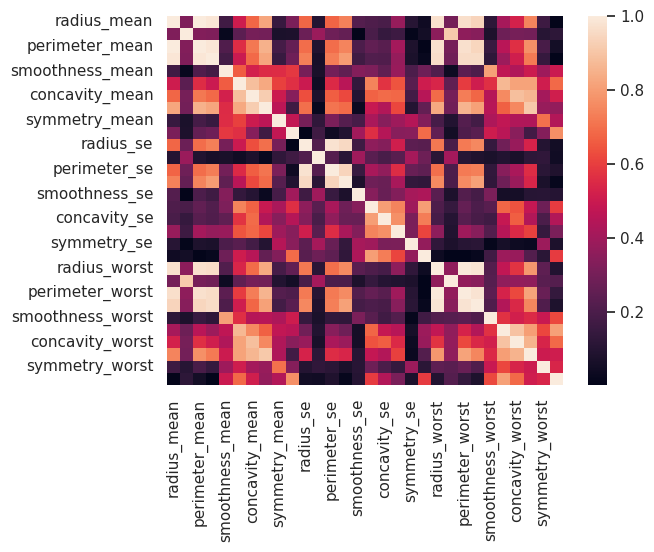

In [8]:
sns.heatmap(df_1.corr(numeric_only=True).abs())

In [14]:
from sklearn.model_selection import train_test_split

le=LabelEncoder()
df_1.diagnosis=le.fit_transform(df_1.diagnosis)


train, temp, _, _ = train_test_split(df_1, df_1, test_size=0.4, random_state=random_state)

test, val, _, _ = train_test_split(temp, temp, test_size=0.5, random_state=random_state)

X_train = train.drop(['diagnosis'], axis =1)
y_train = train['diagnosis']

X_test = test.drop(['diagnosis'], axis =1)
y_test = test['diagnosis']

X_val = val.drop(['diagnosis'], axis =1)
y_val = val['diagnosis']

In [15]:

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('X_val shape: ', X_val.shape)
print()
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)
print('y_val shape: ', y_val.shape)

X_train shape:  (341, 30)
X_test shape:  (114, 30)
X_val shape:  (114, 30)

y_train shape:  (341,)
y_test shape:  (114,)
y_val shape:  (114,)


In [17]:
# Other preprocessing steps- standardize
#print(np.mean(X_train, axis=0))
#print(np.std(X_train, axis=0))

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train_n = (X_train - mean) / std
X_val_n = (X_val - mean) / std
X_test_n = (X_test - mean) / std

#print(np.mean(X_train_n, axis=0))
#print(np.std(X_train_n, axis=0))

In [18]:
X_train=X_train_n.values
X_val=X_val_n.values
X_test=X_test_n.values

y_train=y_train.values
y_test=y_test.values
y_val=y_val.values

In [19]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dropout, Dense, Input, concatenate
from tensorflow.keras.regularizers import L2


In [24]:
# Sequential
model = Sequential()
regularizer = keras.regularizers.l2(0.02)
initializer1 = keras.initializers.GlorotNormal(seed=None)
initializer2 = keras.initializers.HeNormal()

model.add(Input(shape=X_train[1].shape))
model.add(Dense(40, activation='relu')) #Dense_1
model.add(Dropout(0.2))
model.add(Dense(30,kernel_initializer=initializer1, activation='relu', kernel_regularizer=regularizer)) #Dense_2
model.add(Dropout(0.2))
model.add(Dense(15,kernel_initializer=initializer2, activation='relu', kernel_regularizer=regularizer)) #Dense_3
model.add(Dropout(0.3))
model.add(Dense(10,kernel_initializer=initializer1, activation='relu', kernel_regularizer=regularizer)) #Dense_4
model.add(Dropout(0.3))
model.add(Dense(5,kernel_initializer=initializer2, activation='relu', kernel_regularizer=regularizer)) #Dense_5
model.add(Dropout(0.3))
model.add(Dense(1,kernel_initializer=initializer1, activation='sigmoid', kernel_regularizer=regularizer)) #output


# Replace None with your choice of loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 40)                1240      
                                                                 
 dropout_10 (Dropout)        (None, 40)                0         
                                                                 
 dense_13 (Dense)            (None, 30)                1230      
                                                                 
 dropout_11 (Dropout)        (None, 30)                0         
                                                                 
 dense_14 (Dense)            (None, 15)                465       
                                                                 
 dropout_12 (Dropout)        (None, 15)                0         
                                                                 
 dense_15 (Dense)            (None, 10)               

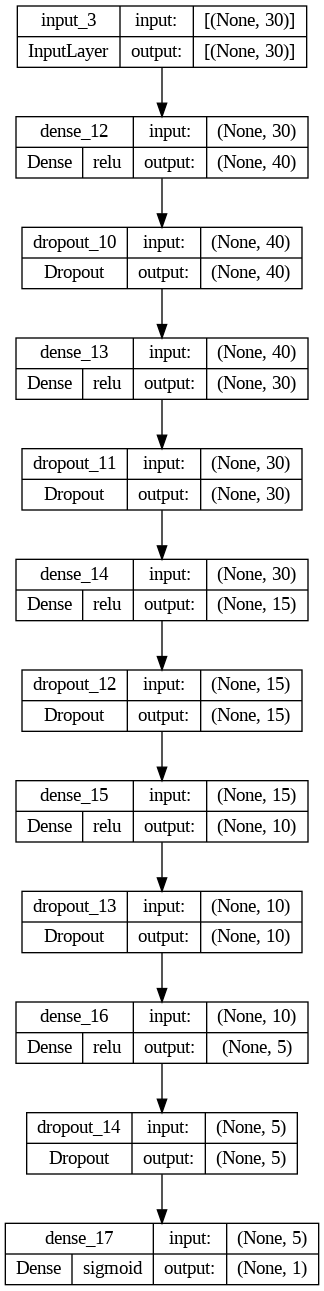

In [25]:
keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True, to_file='ans_sequential_model.png')

In [26]:
history = model.fit(X_train, y_train,
                     validation_data=(X_val, y_val),
                     batch_size=32,
                     epochs=200,
                     shuffle=True,
                     callbacks=[keras.callbacks.TensorBoard('logs/adam_original')])

Epoch 1/200
11/11 [==============================] - 3s 41ms/step - loss: 2.2881 - accuracy: 0.6364 - val_loss: 2.2010 - val_accuracy: 0.7982
Epoch 2/200
11/11 [==============================] - 0s 8ms/step - loss: 2.1341 - accuracy: 0.7302 - val_loss: 2.0541 - val_accuracy: 0.8421
Epoch 3/200
11/11 [==============================] - 0s 9ms/step - loss: 2.0223 - accuracy: 0.7537 - val_loss: 1.9105 - val_accuracy: 0.8947
Epoch 4/200
11/11 [==============================] - 0s 10ms/step - loss: 1.8964 - accuracy: 0.7742 - val_loss: 1.7769 - val_accuracy: 0.9123
Epoch 5/200
11/11 [==============================] - 0s 8ms/step - loss: 1.8524 - accuracy: 0.7067 - val_loss: 1.6582 - val_accuracy: 0.9123
Epoch 6/200
11/11 [==============================] - 0s 9ms/step - loss: 1.7136 - accuracy: 0.7449 - val_loss: 1.5561 - val_accuracy: 0.9298
Epoch 7/200
11/11 [==============================] - 0s 9ms/step - loss: 1.6559 - accuracy: 0.7507 - val_loss: 1.4679 - val_accuracy: 0.9298
Epoch 8/200

In [27]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=0) # Evaluate the model on train data
print(f"Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}")

loss, accuracy = model.evaluate(X_val, y_val, verbose=0) # Evaluate the model on validation data
print(f"validation Loss: {loss:.4f}, validation Accuracy: {accuracy:.4f}")

loss, accuracy = model.evaluate(X_test, y_test, verbose=0) # Evaluate the model on test data
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Train Loss: 0.1738, Train Accuracy: 0.9912
validation Loss: 0.1796, validation Accuracy: 0.9912
Test Loss: 0.1922, Test Accuracy: 0.9737


In [28]:
# Implement the model using Functional API
input = Input(shape=X_train[1].shape, name='Input')
dense_1 = Dense(40, activation='relu', name = 'Dense_1')(input) #Dense_1
dropout_1 = Dropout(0.2, name = 'Dropout_1')(dense_1)
dense_2 = Dense(30,kernel_initializer=initializer1, activation='relu', kernel_regularizer=regularizer, name = 'Dense_2')(dropout_1) #Dense_2
dropout_2 = Dropout(0.2, name = 'Dropout_2')(dense_2)
dense_3 = Dense(15,kernel_initializer=initializer2, activation='relu', kernel_regularizer=regularizer,name = 'Dense_3')(dropout_2) #Dense_3
dropout_3 = Dropout(0.3, name = 'Dropout_3')(dense_3)
dense_4 = Dense(10,kernel_initializer=initializer1, activation='relu', kernel_regularizer=regularizer,name = 'Dense_4')(dropout_3) #Dense_4
dropout_4 = Dropout(0.3, name = 'Dropout_4')(dense_4)
dense_5 = Dense(5,kernel_initializer=initializer2, activation='relu', kernel_regularizer=regularizer,name = 'Dense_5')(dropout_4) #Dense_5
dropout_5 = Dropout(0.3, name = 'Dropout_5')(dense_5)
concat = concatenate([input,dropout_5])
output = Dense(1,kernel_initializer=initializer1, activation='sigmoid', kernel_regularizer=regularizer)(concat) #output
model_f = Model(inputs=[input], outputs= [output]) # Replace None with your choice of input and output layers

# Replace None with your choice of loss function and optimizer
model_f.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

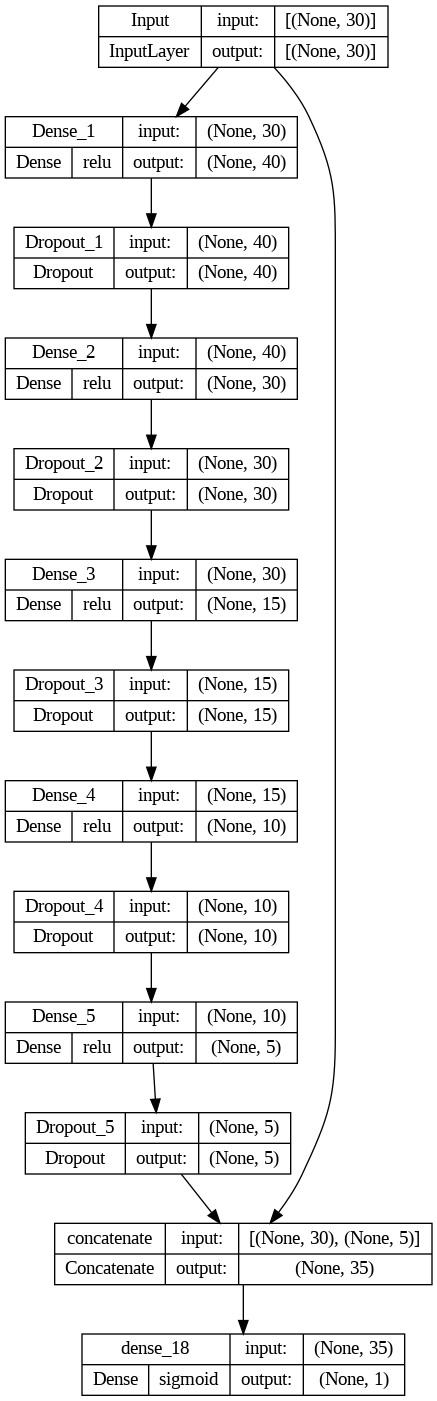

In [29]:
keras.utils.plot_model(model_f, show_shapes=True, show_layer_activations=True, to_file='ans_functional_model.png')

In [30]:
history_f = model_f.fit(X_train, y_train,
                     validation_data=(X_val, y_val),
                     batch_size=32,
                     epochs=200,
                     shuffle=True)

Epoch 1/200
11/11 [==============================] - 4s 51ms/step - loss: 2.4064 - accuracy: 0.5660 - val_loss: 2.2472 - val_accuracy: 0.6053
Epoch 2/200
11/11 [==============================] - 0s 23ms/step - loss: 2.2228 - accuracy: 0.6217 - val_loss: 2.0694 - val_accuracy: 0.6930
Epoch 3/200
11/11 [==============================] - 0s 16ms/step - loss: 2.0564 - accuracy: 0.6833 - val_loss: 1.9075 - val_accuracy: 0.7807
Epoch 4/200
11/11 [==============================] - 0s 7ms/step - loss: 1.9036 - accuracy: 0.7302 - val_loss: 1.7652 - val_accuracy: 0.7982
Epoch 5/200
11/11 [==============================] - 0s 9ms/step - loss: 1.7560 - accuracy: 0.7595 - val_loss: 1.6348 - val_accuracy: 0.8246
Epoch 6/200
11/11 [==============================] - 0s 18ms/step - loss: 1.6352 - accuracy: 0.7859 - val_loss: 1.5149 - val_accuracy: 0.8333
Epoch 7/200
11/11 [==============================] - 0s 8ms/step - loss: 1.5283 - accuracy: 0.8094 - val_loss: 1.4075 - val_accuracy: 0.8421
Epoch 8/2

In [31]:

loss, accuracy = model_f.evaluate(X_train, y_train, verbose=0) # Evaluate the model on train data
print(f"Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}")

loss, accuracy = model_f.evaluate(X_val, y_val, verbose=0) # Evaluate the model on validation data
print(f"validation Loss: {loss:.4f}, validation Accuracy: {accuracy:.4f}")

loss, accuracy = model_f.evaluate(X_test, y_test, verbose=0) # Evaluate the model on test data
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Train Loss: 0.1701, Train Accuracy: 0.9824
validation Loss: 0.1605, validation Accuracy: 0.9825
Test Loss: 0.1492, Test Accuracy: 0.9912


In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}")

11/11 [==============================] - 0s 3ms/step - loss: 0.1738 - accuracy: 0.9912
Train Loss: 0.1738, Train Accuracy: 0.9912


In [34]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

4/4 [==============================] - 0s 8ms/step - loss: 0.1922 - accuracy: 0.9737
Test Loss: 0.1922, Test Accuracy: 0.9737


In [35]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 3ms/step


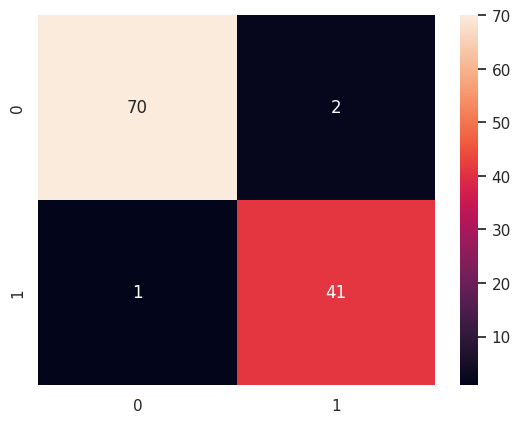

In [36]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.95      0.98      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 40)                1240      
                                                                 
 dropout_10 (Dropout)        (None, 40)                0         
                                                                 
 dense_13 (Dense)            (None, 30)                1230      
                                                                 
 dropout_11 (Dropout)        (None, 30)                0         
                                                                 
 dense_14 (Dense)            (None, 15)                465       
                                                                 
 dropout_12 (Dropout)        (None, 15)                0         
                                                                 
 dense_15 (Dense)            (None, 10)               

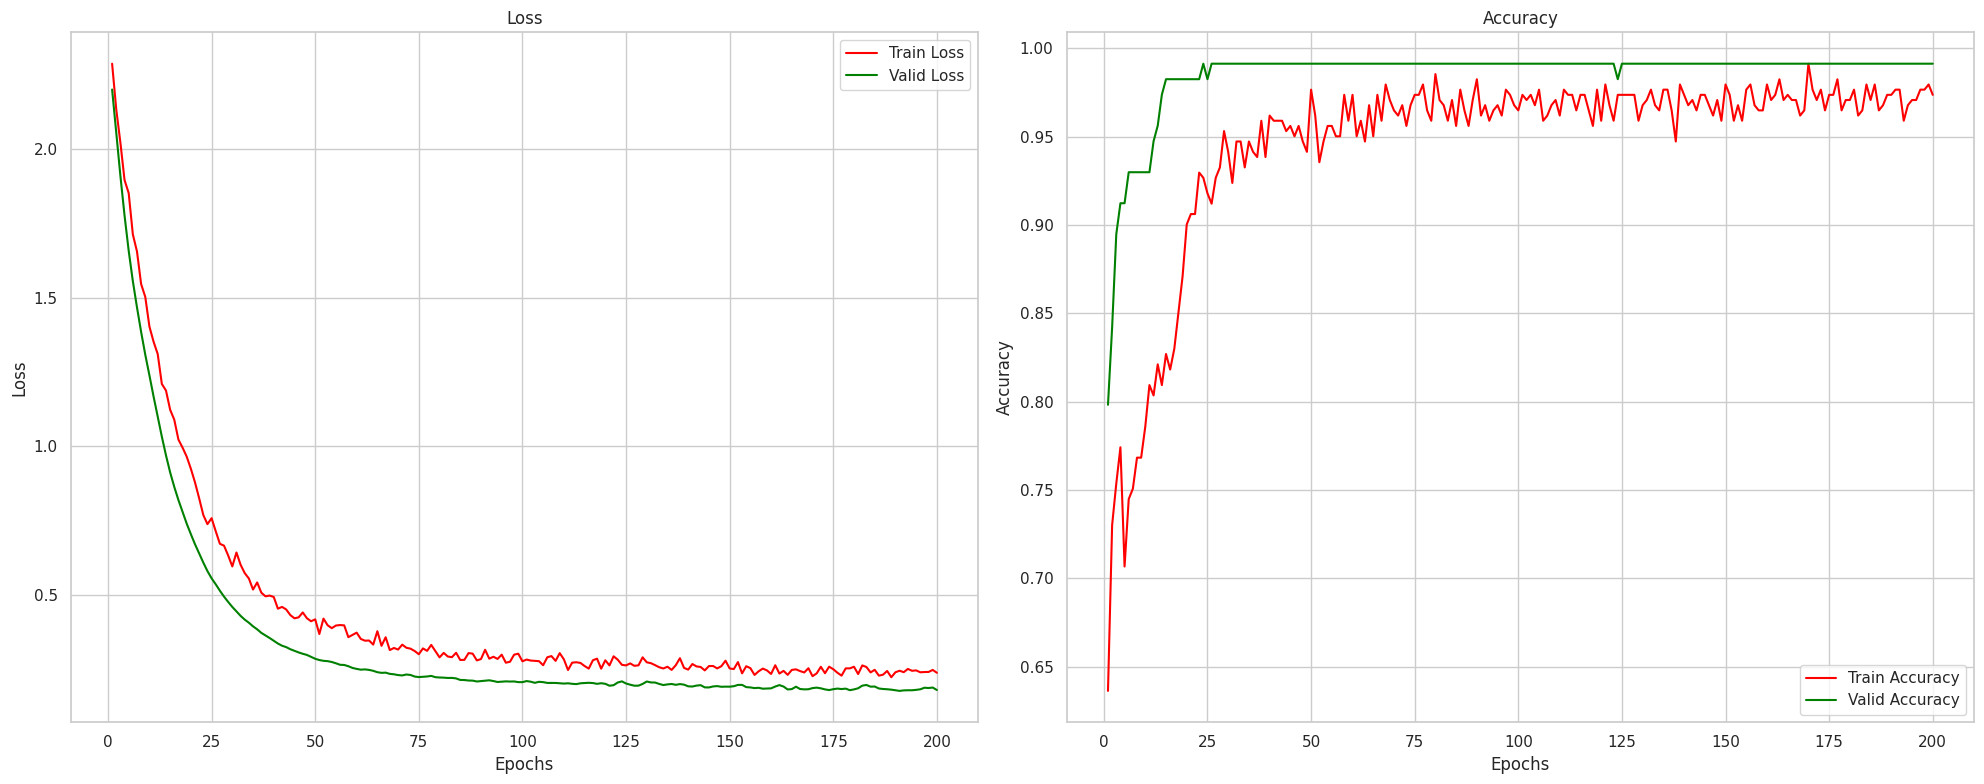

In [39]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [40]:
# Do the same for Functional API model

In [41]:
loss, accuracy = model_f.evaluate(X_train, y_train)
print(f"Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}")

loss, accuracy = model_f.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


11/11 [==============================] - 0s 3ms/step - loss: 0.1701 - accuracy: 0.9824
Train Loss: 0.1701, Train Accuracy: 0.9824
4/4 [==============================] - 0s 6ms/step - loss: 0.1492 - accuracy: 0.9912
Test Loss: 0.1492, Test Accuracy: 0.9912


In [42]:
y_pred = model_f.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 7ms/step


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



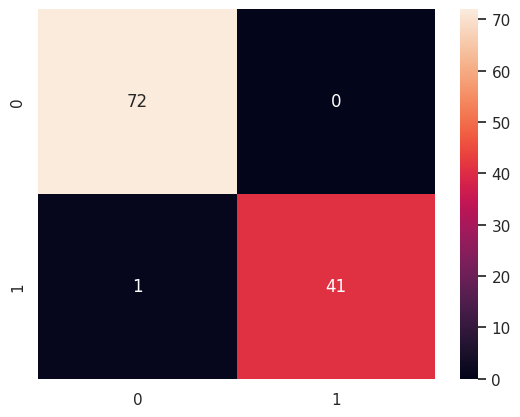

In [43]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

print(classification_report(y_test, y_pred))


In [44]:
model_f.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 30)]                 0         []                            
                                                                                                  
 Dense_1 (Dense)             (None, 40)                   1240      ['Input[0][0]']               
                                                                                                  
 Dropout_1 (Dropout)         (None, 40)                   0         ['Dense_1[0][0]']             
                                                                                                  
 Dense_2 (Dense)             (None, 30)                   1230      ['Dropout_1[0][0]']           
                                                                                              

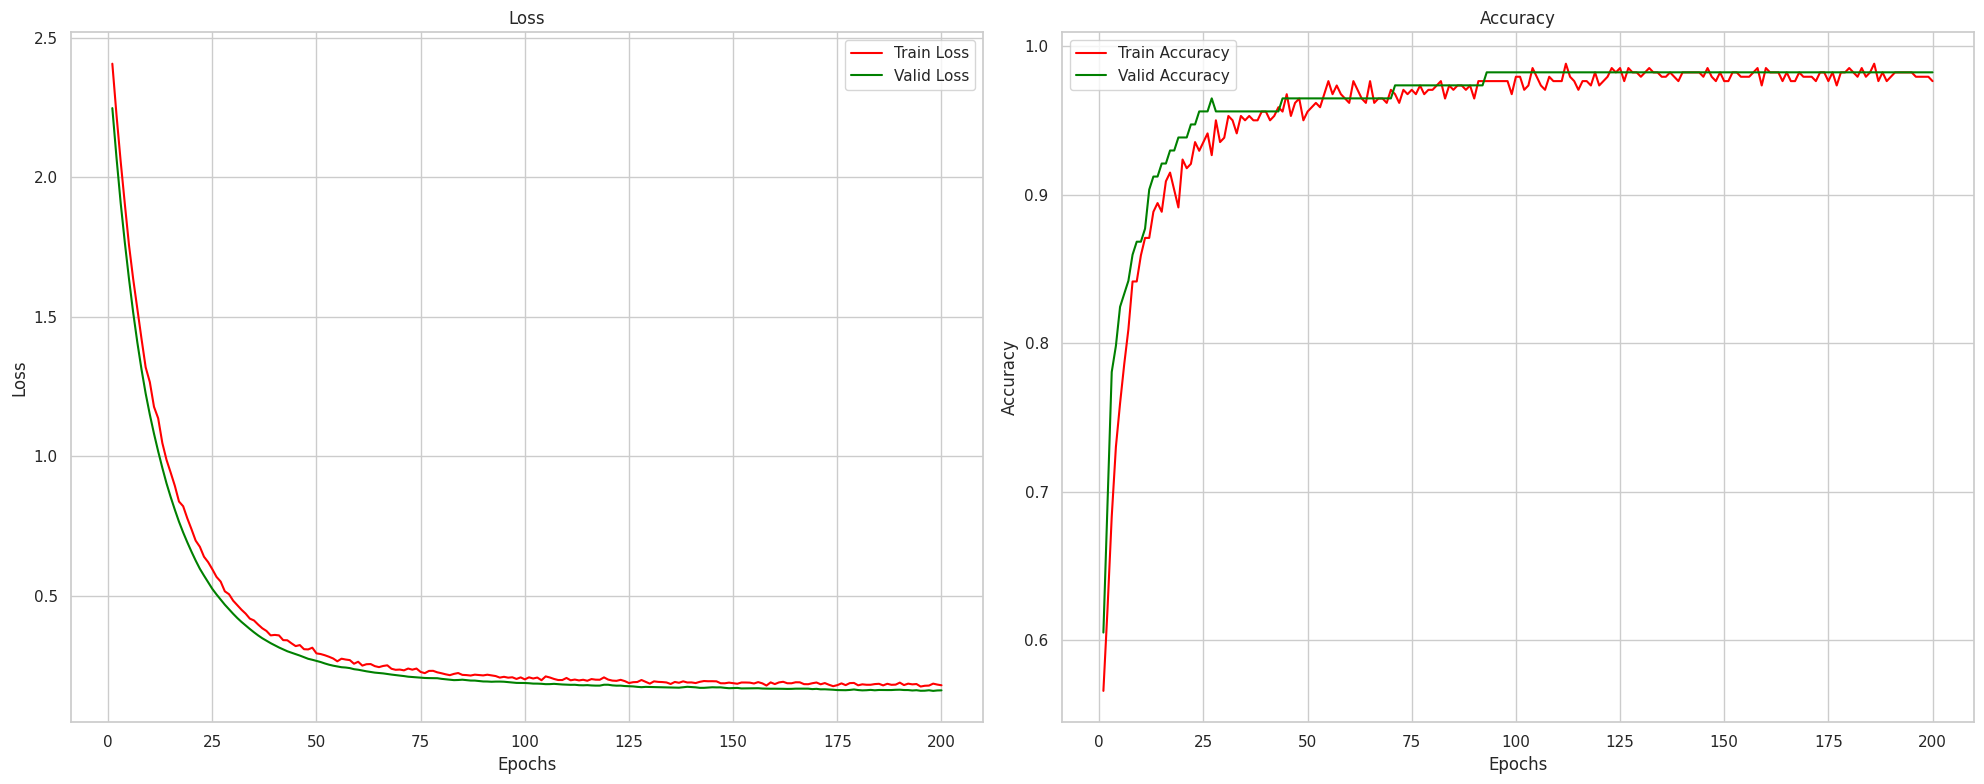

In [45]:


tr_acc = history_f.history['accuracy']
tr_loss = history_f.history['loss']
val_acc = history_f.history['val_accuracy']
val_loss = history_f.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()